# 思路
为了解决从深圳到西安的最优路线问题，我采用以下步骤：

    ​​问题建模​​：将城市视为图的顶点，城市间的运输时间视为边的权重，建立带权重的有向图。

    ​​算法选择​​：使用​​Dijkstra算法​​，适用于在非负权重图中查找单源最短路径（本例中源点是"深圳"，目标是"西安"）。算法核心是：
        维护一个优先队列（最小堆）来选择当前距离最短的节点
        每次扩展节点时更新邻接节点的最短距离和前驱节点

    ​​路径回溯​​：算法结束后，从目标节点"西安"回溯到源点"深圳"，得到完整路径。

    ​​图形化展示​​：使用NetworkX库可视化城市图和最短路径，用不同颜色突出显示最短路径。


Big荔枝最优路径: 深圳 → 广州 → 长沙 → 武汉 → 西安
Big荔枝运输总时间: 20.0 小时


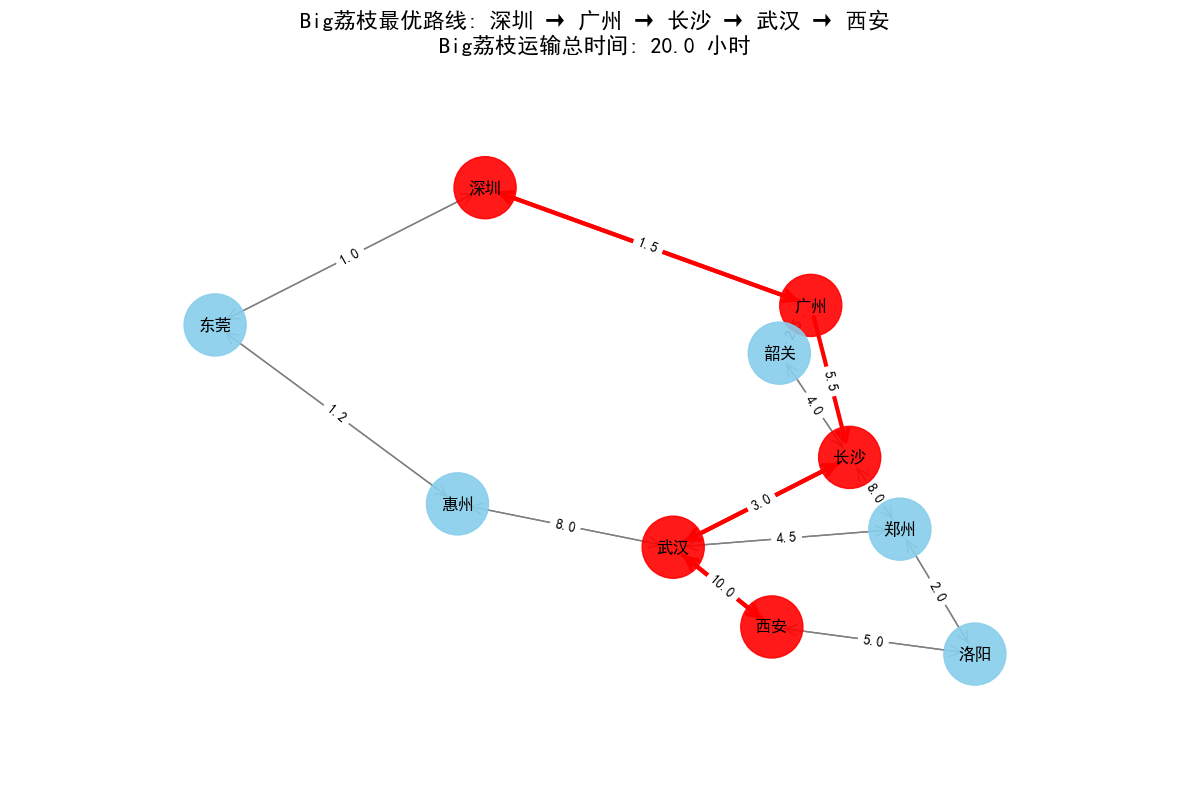

In [ ]:
# -*- coding: utf-8 -*-
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# 城市图数据
city_graph = {
    '深圳': {'广州': 1.5, '东莞': 1.0},
    '广州': {'深圳': 1.5, '韶关': 2.5, '长沙': 5.5},
    '东莞': {'深圳': 1.0, '惠州': 1.2},
    '惠州': {'东莞': 1.2, '武汉': 8.0},
    '韶关': {'广州': 2.5, '长沙': 4.0},
    '长沙': {'韶关': 4.0, '武汉': 3.0, '郑州': 8.0},
    '武汉': {'惠州': 8.0, '长沙': 3.0, '郑州': 4.5, '西安': 10.0},
    '郑州': {'长沙': 8.0, '武汉': 4.5, '洛阳': 2.0},
    '洛阳': {'郑州': 2.0, '西安': 5.0},
    '西安': {'武汉': 10.0, '洛阳': 5.0}
}

def dijkstra(graph, start, end):
    # 初始化所有节点距离为无穷大
    distances = {city: float('inf') for city in graph}
    distances[start] = 0  # 源点距离设为0
    prev_nodes = {city: None for city in graph}  # 记录前驱节点
    
    # 优先队列：(距离, 城市)
    pq = [(0, start)]
    
    while pq:
        curr_dist, curr_city = heapq.heappop(pq)
        
        # 如果当前距离大于已记录距离，跳过
        if curr_dist > distances[curr_city]:
            continue
        
        # 遍历邻接城市
        for neighbor, weight in graph[curr_city].items():
            distance = curr_dist + weight
            # 发现更短路径时更新
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                prev_nodes[neighbor] = curr_city
                heapq.heappush(pq, (distance, neighbor))
    
    # 回溯构建路径
    path = []
    curr = end
    while curr:
        path.append(curr)
        curr = prev_nodes[curr]
    path.reverse()
    
    return distances[end], path

def plot_path(graph, path, total_cost):
    G = nx.DiGraph()
    
    # 添加节点和边
    for city, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(city, neighbor, weight=weight)
    
    # 设置布局
    pos = nx.spring_layout(G, seed=42)
    
    # 创建节点颜色列表
    node_colors = ['red' if city in path else 'skyblue' for city in G.nodes()]
    
    # 创建边颜色列表
    edge_colors = []
    edge_widths = []
    for u, v in G.edges():
        if u in path and v in path:
            idx_u = path.index(u)
            idx_v = path.index(v)
            if abs(idx_u - idx_v) == 1:  # 检查是否连续节点
                edge_colors.append('red')
                edge_widths.append(3.0)
                continue
        edge_colors.append('gray')
        edge_widths.append(1.0)
    
    # 绘制图
    plt.figure(figsize=(12, 8))
    
    # 绘制节点和边
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, 
                           arrowstyle='->', arrowsize=20)
    
    # 添加节点标签
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # 添加边的权重标签
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # 设置标题
    plt.title(f"Big荔枝最优路线: {' → '.join(path)}\nBig荔枝运输总时间: {total_cost} 小时", fontsize=16)
    
    # 显示网格并调整边界
    plt.axis('off')
    plt.margins(0.2)
    plt.tight_layout()
    plt.show()

# 计算最短路径
if __name__ == "__main__":
    start_city = "深圳"
    end_city = "西安"
    
    total_cost, optimal_path = dijkstra(city_graph, start_city, end_city)
    
    # 打印结果
    print(f"Big荔枝最优路径: {' → '.join(optimal_path)}")
    print(f"Big荔枝运输总时间: {total_cost} 小时")
    
    # 图形化展示
    #解决 matplotlib 中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plot_path(city_graph, optimal_path, total_cost)

# A * 算法
OK!  Dijkstra算法也简简单单，来试试A * 算法

Big荔枝最优路径: 深圳 → 广州 → 长沙 → 武汉 → 西安
Big荔枝运输总时间: 20.0 小时


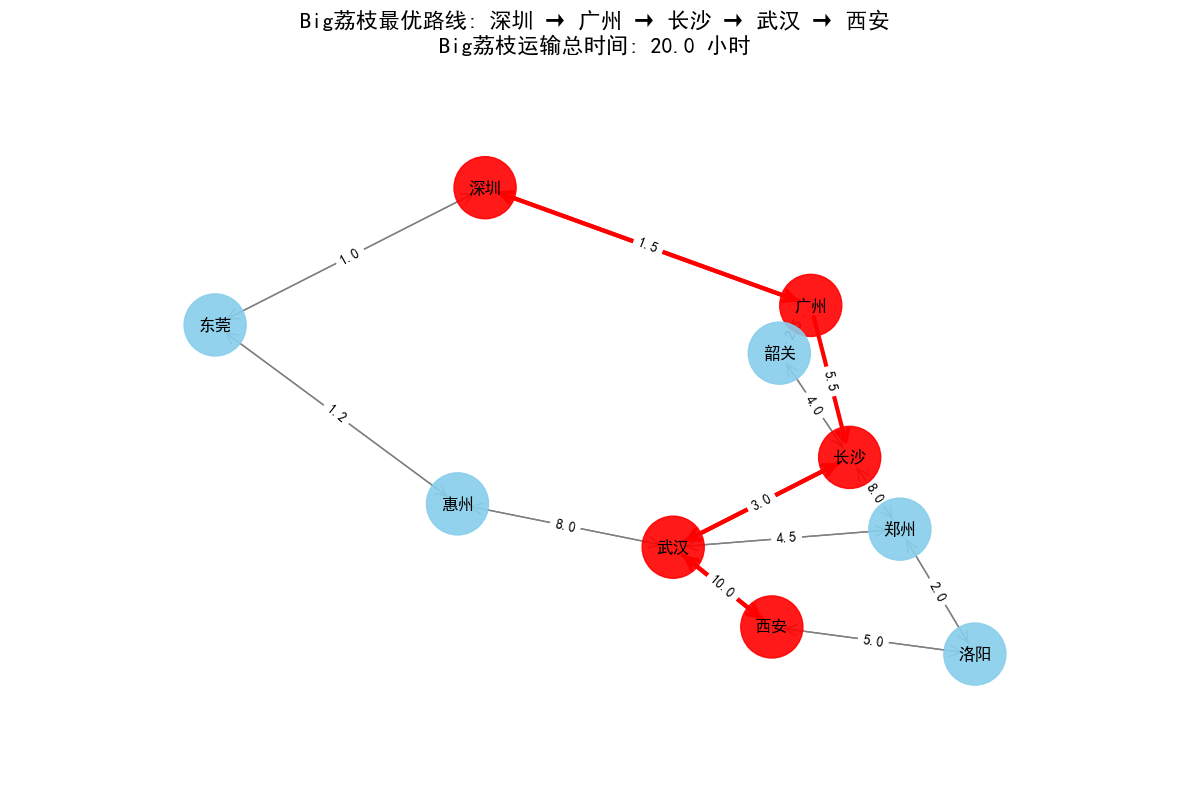

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# 城市图数据
city_graph = {
    '深圳': {'广州': 1.5, '东莞': 1.0},
    '广州': {'深圳': 1.5, '韶关': 2.5, '长沙': 5.5},
    '东莞': {'深圳': 1.0, '惠州': 1.2},
    '惠州': {'东莞': 1.2, '武汉': 8.0},
    '韶关': {'广州': 2.5, '长沙': 4.0},
    '长沙': {'韶关': 4.0, '武汉': 3.0, '郑州': 8.0},
    '武汉': {'惠州': 8.0, '长沙': 3.0, '郑州': 4.5, '西安': 10.0},
    '郑州': {'长沙': 8.0, '武汉': 4.5, '洛阳': 2.0},
    '洛阳': {'郑州': 2.0, '西安': 5.0},
    '西安': {'武汉': 10.0, '洛阳': 5.0}
}

# 城市经纬度数据（虚构，仅用于启发式函数）
city_coordinates = {
    '深圳': (113.94, 22.54),
    '广州': (113.27, 23.13),
    '东莞': (113.75, 23.04),
    '惠州': (114.4, 23.09),
    '韶关': (113.62, 24.84),
    '长沙': (112.98, 28.12),
    '武汉': (114.31, 30.52),
    '郑州': (113.65, 34.76),
    '洛阳': (112.44, 34.7),
    '西安': (108.95, 34.27)
}

def heuristic(start, goal):
    """
    启发式函数：计算两个城市之间的直线距离（简化版）
    这里使用经纬度数据计算欧几里得距离作为启发式估计
    """
    if start not in city_coordinates or goal not in city_coordinates:
        return 0
    
    x1, y1 = city_coordinates[start]
    x2, y2 = city_coordinates[goal]
    
    # 计算欧几里得距离
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def a_star(graph, start, end, heuristic_func):
    """
    使用A*算法计算最优路径
    :param graph: 城市图
    :param start: 起点
    :param end: 终点
    :param heuristic_func: 启发式函数
    :return: 总代价，最优路径
    """
    # 初始化起点的实际代价
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    
    # 初始化起点的估计总代价
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic_func(start, end)
    
    # 初始化优先队列
    open_set = [(f_score[start], start)]
    
    # 记录路径
    came_from = {}
    
    while open_set:
        # 获取f值最小的节点
        _, current = heapq.heappop(open_set)
        
        # 如果到达终点，结束搜索
        if current == end:
            # 构建路径
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return g_score[end], path
        
        # 遍历当前节点的所有邻居
        for neighbor, time in graph[current].items():
            # 计算从起点到邻居的新实际代价
            tentative_g_score = g_score[current] + time
            
            # 如果新代价更小，更新记录
            if tentative_g_score < g_score[neighbor]:
                # 记录路径
                came_from[neighbor] = current
                
                # 更新实际代价
                g_score[neighbor] = tentative_g_score
                
                # 更新估计总代价
                f_score[neighbor] = tentative_g_score + heuristic_func(neighbor, end)
                
                # 将邻居加入优先队列
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    
    # 如果没有找到路径
    return None, []

def plot_path(graph, path, total_cost):
    G = nx.DiGraph()
    
    # 添加节点和边
    for city, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(city, neighbor, weight=weight)
    
    # 设置布局
    pos = nx.spring_layout(G, seed=42)
    
    # 创建节点颜色列表
    node_colors = ['red' if city in path else 'skyblue' for city in G.nodes()]
    
    # 创建边颜色列表
    edge_colors = []
    edge_widths = []
    for u, v in G.edges():
        if u in path and v in path:
            idx_u = path.index(u)
            idx_v = path.index(v)
            if abs(idx_u - idx_v) == 1:  # 检查是否连续节点
                edge_colors.append('red')
                edge_widths.append(3.0)
                continue
        edge_colors.append('gray')
        edge_widths.append(1.0)
    
    # 绘制图
    plt.figure(figsize=(12, 8))
    
    # 绘制节点和边
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, 
                           arrowstyle='->', arrowsize=20)
    
    # 添加节点标签
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # 添加边的权重标签
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # 设置标题
    plt.title(f"Big荔枝最优路线: {' → '.join(path)}\nBig荔枝运输总时间: {total_cost} 小时", fontsize=16)
    
    # 显示网格并调整边界
    plt.axis('off')
    plt.margins(0.2)
    plt.tight_layout()
    plt.show()

# 计算最短路径
if __name__ == "__main__":
    start_city = "深圳"
    end_city = "西安"
    
    total_cost, optimal_path = a_star(city_graph, start_city, end_city, heuristic)
    
    # 打印结果
    print(f"Big荔枝最优路径: {' → '.join(optimal_path)}")
    print(f"Big荔枝运输总时间: {total_cost} 小时")
    
    # 图形化展示
    #解决 matplotlib 中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plot_path(city_graph, optimal_path, total_cost)

# 优化 

Big荔枝最优路径: 深圳 → 广州 → 长沙 → 武汉 → 西安
Big荔枝总运输时间: 20.0 小时


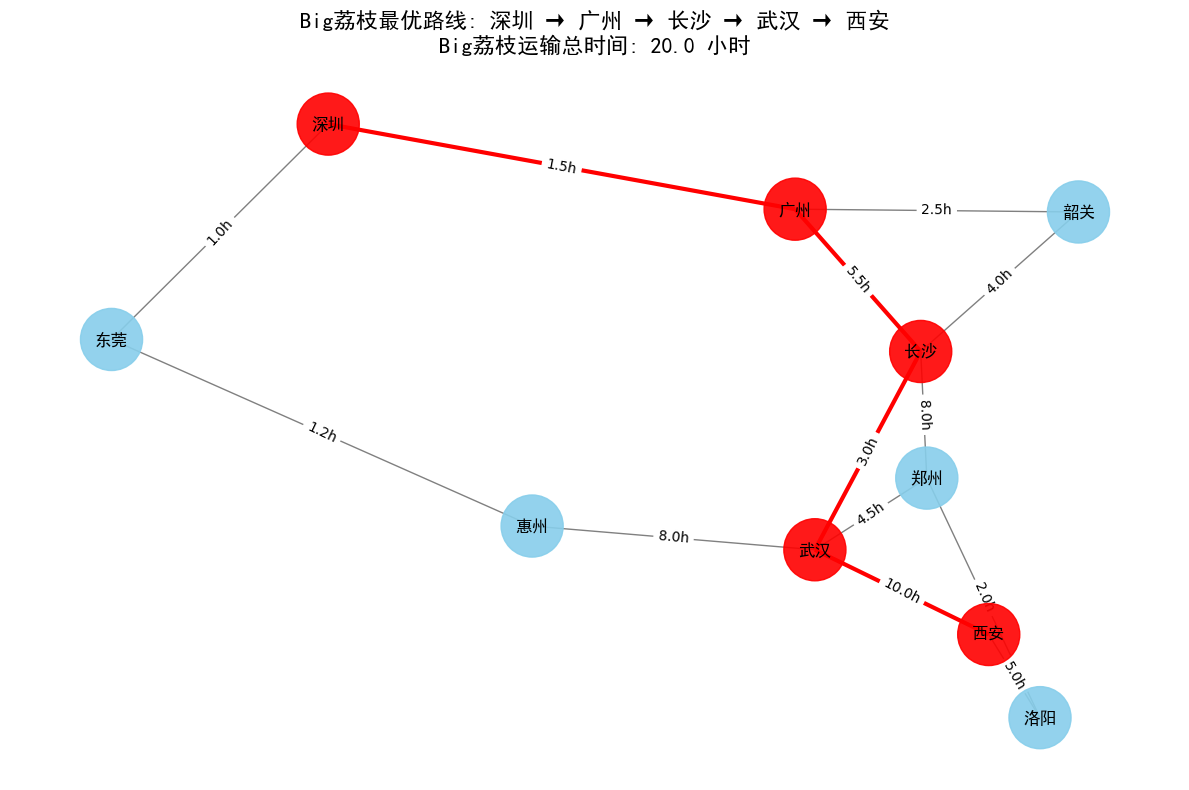

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# 城市图数据，包含运输时间
city_graph = {
    '深圳': {'广州': 1.5, '东莞': 1.0},
    '广州': {'深圳': 1.5, '韶关': 2.5, '长沙': 5.5},
    '东莞': {'深圳': 1.0, '惠州': 1.2},
    '惠州': {'东莞': 1.2, '武汉': 8.0},
    '韶关': {'广州': 2.5, '长沙': 4.0},
    '长沙': {'韶关': 4.0, '武汉': 3.0, '郑州': 8.0},
    '武汉': {'惠州': 8.0, '长沙': 3.0, '郑州': 4.5, '西安': 10.0},
    '郑州': {'长沙': 8.0, '武汉': 4.5, '洛阳': 2.0},
    '洛阳': {'郑州': 2.0, '西安': 5.0},
    '西安': {'武汉': 10.0, '洛阳': 5.0}
}



def dijkstra(graph, start, end):
    """
    使用Dijkstra算法计算最优路径
    :param graph: 城市图
    :param start: 起点
    :param end: 终点
    :return: 总代价，最优路径
    """
    # 初始化距离字典，存储从起点到各个节点的最小代价
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    # 初始化前驱节点字典，用于记录路径
    predecessors = {node: None for node in graph}
    
    # 初始化优先队列
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # 如果到达终点，结束搜索
        if current_node == end:
            break
            
        # 如果当前距离大于已记录的最小距离，跳过
        if current_distance > distances[current_node]:
            continue
            
        # 遍历当前节点的所有邻居
        for neighbor, time in graph[current_node].items():
            # 计算从起点到邻居的新距离
            distance = current_distance + time
            
            # 如果新距离更小，更新距离和前驱节点
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
    
    # 构建路径
    path = []
    current_node = end
    
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    
    # 反转路径，使其从起点到终点
    path.reverse()
    
    return distances[end], path

# 计算从深圳到西安的最优路径
total_time, path = dijkstra(city_graph, '深圳', '西安')

def visualize_graph(graph, path=None):
    """可视化城市图和最优路径"""
    G = nx.Graph()
    
    # 添加节点和边
    for city, neighbors in graph.items():
        G.add_node(city)
        for neighbor, time in neighbors.items():
            G.add_edge(city, neighbor, weight=time)
    
    # 绘制图形
    plt.figure(figsize=(12, 8))
    
    # 计算节点位置
    pos = nx.spring_layout(G, seed=42)
    
    
      # 创建节点颜色列表
    node_colors = ['red' if city in path else 'skyblue' for city in G.nodes()]

    # 创建边颜色列表
    edge_colors = []
    edge_widths = []
    for u, v in G.edges():
        if u in path and v in path:
            idx_u = path.index(u)
            idx_v = path.index(v)
            if abs(idx_u - idx_v) == 1:  # 检查是否连续节点
                edge_colors.append('red')
                edge_widths.append(3.0)
                continue
        edge_colors.append('gray')
        edge_widths.append(1.0)
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, 
                           arrowstyle='->', arrowsize=20)    
    
    # 绘制节点标签
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei')
    
    # 绘制边标签（运输时间）
    edge_labels = {(u, v): f"{d['weight']}h" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.axis('off')
    # 设置标题
    plt.title(f"Big荔枝最优路线: {' → '.join(path)}\nBig荔枝运输总时间: {total_time} 小时", fontsize=16,fontfamily='SimHei')
    plt.tight_layout()
    plt.show()

def main():

    
    # 输出结果
    print("Big荔枝最优路径:", " → ".join(path))
    print(f"Big荔枝总运输时间: {total_time} 小时")
    
    # 可视化结果
    visualize_graph(city_graph, path)

if __name__ == "__main__":
    main()

# 进阶优化！
✅ 加入费用优化
比如每段路程有个运输费用字段，你可以做双目标选择（费用 vs 时间），甚至加入权重因子。
✅ 加入断路逻辑
如果城市之间突然“断联”，你可以在图中临时删除某条边再重新运行算法，模拟现实变化。
具体实现思路

    数据结构设计：使用嵌套字典表示城市图，每个节点包含邻居节点及对应的运输时间和费用。计算从深圳到西安的最优路径（默认同时考虑时间和费用）
     
    算法选择：采用 Dijkstra 算法计算最优路径，通过权重因子实现时间和费用的双目标优化。
     
    断路逻辑：临时删除边的功能，模拟现实中的道路中断情况。模拟深圳到广州关键路径断路后的路径重新规划
     
    可视化：使用 networkx 和 matplotlib 库绘制城市图和最优路径，直观展示结果。

Big荔枝最优路径: 深圳 → 广州 → 长沙 → 武汉 → 西安
Big荔枝总运输时间: 20.0 小时
Big荔枝总运输费用: ¥1080


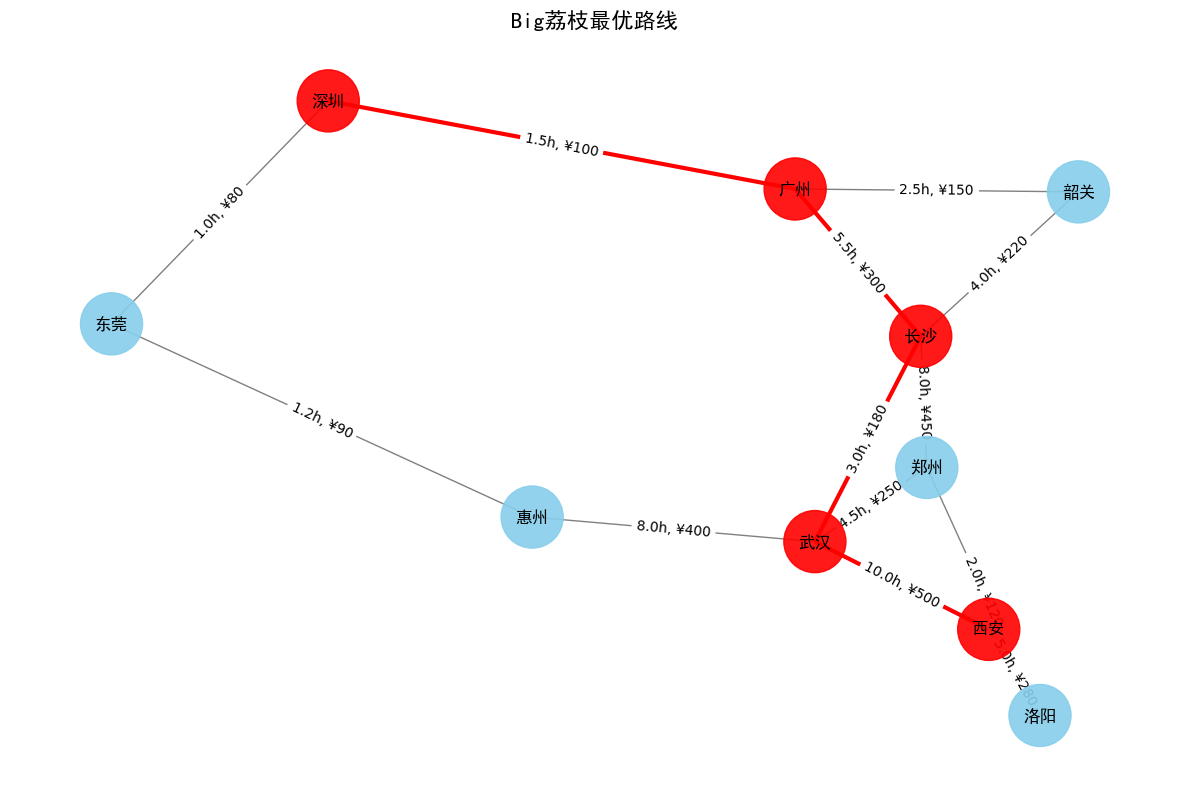


双目标优化：

最快的路径：
Big荔枝运输路径: 深圳 → 广州 → 长沙 → 武汉 → 西安
Big荔枝总运输时间: 20.0 小时
Big荔枝总运输费用: ¥1080


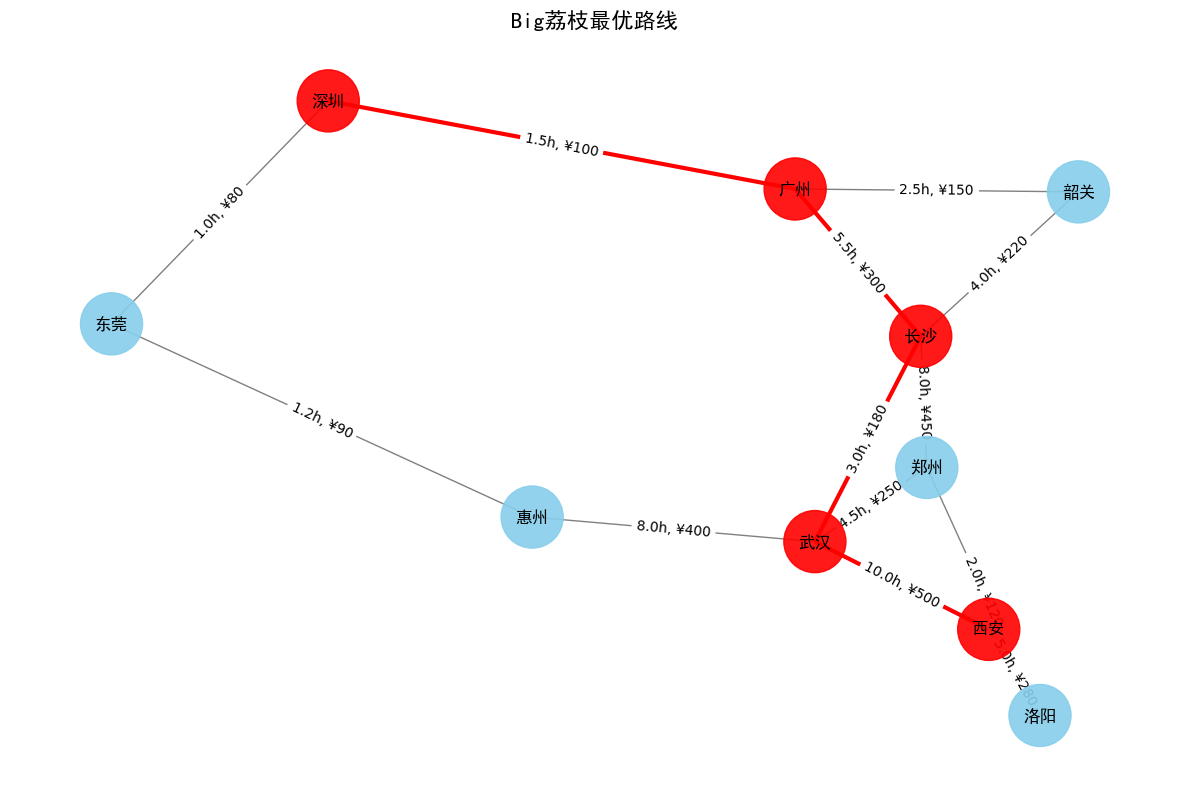


最省钱的路径：
Big荔枝运输路径: 深圳 → 东莞 → 惠州 → 武汉 → 西安
Big荔枝总运输时间: 20.2 小时
Big荔枝总运输费用: ¥1070


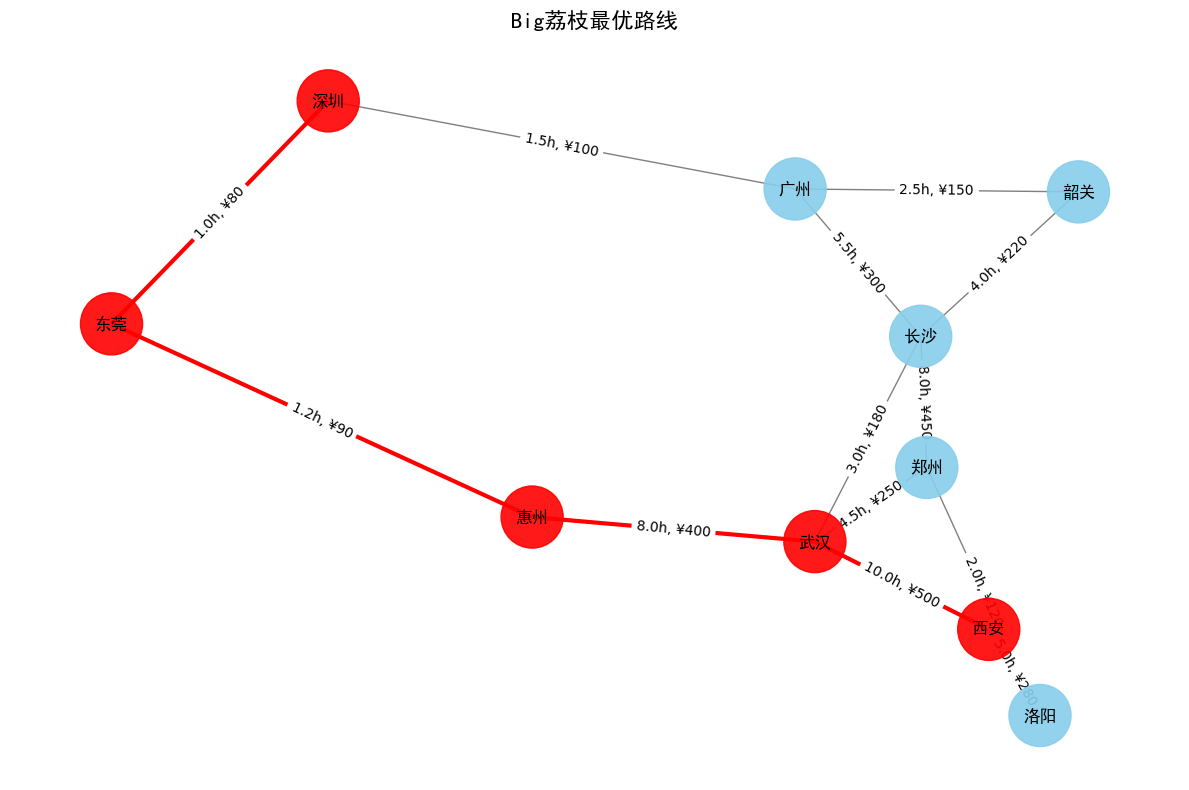


模拟断路：假设广州到韶关的道路临时关闭
新的Big荔枝最优路径: 深圳 → 东莞 → 惠州 → 武汉 → 西安
新的Big荔枝总运输时间: 20.2 小时
新的Big荔枝总运输费用: ¥1070


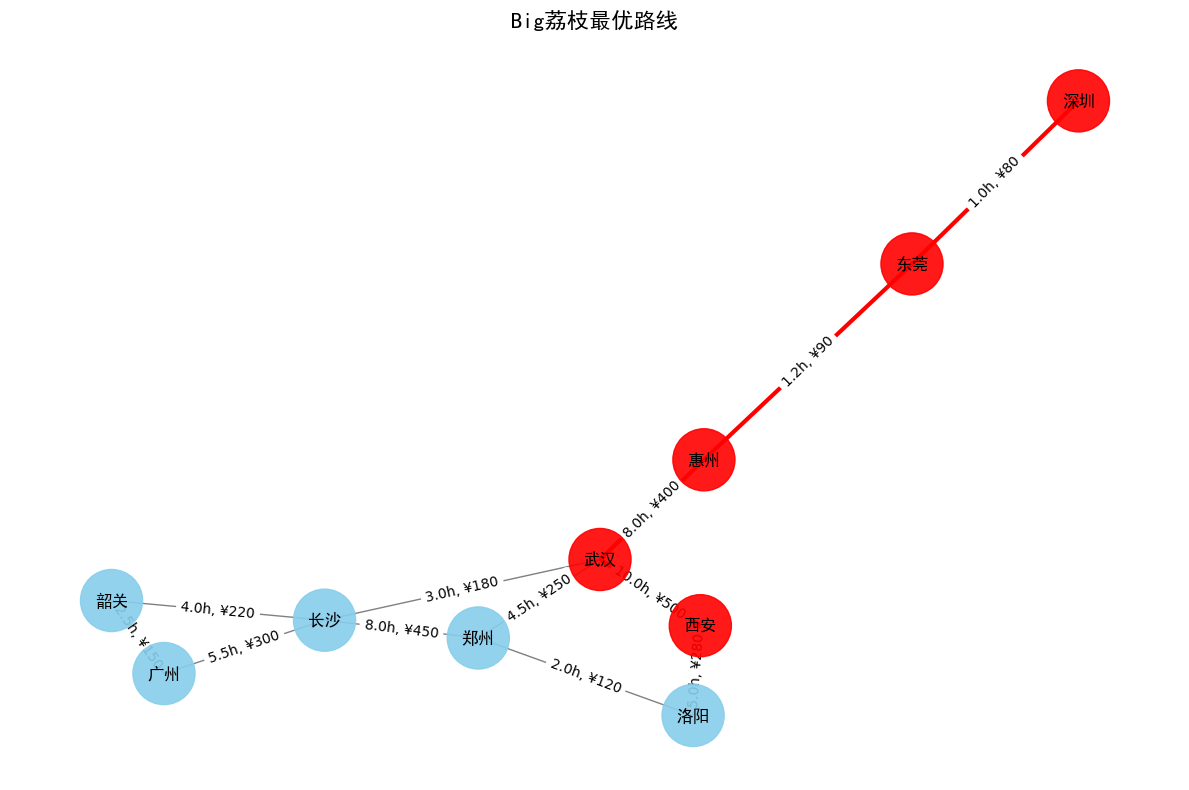

In [ ]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# 城市图数据，包含运输时间和费用
city_graph = {
    '深圳': {'广州': {'time': 1.5, 'cost': 100}, '东莞': {'time': 1.0, 'cost': 80}},
    '广州': {'深圳': {'time': 1.5, 'cost': 100}, '韶关': {'time': 2.5, 'cost': 150}, '长沙': {'time': 5.5, 'cost': 300}},
    '东莞': {'深圳': {'time': 1.0, 'cost': 80}, '惠州': {'time': 1.2, 'cost': 90}},
    '惠州': {'东莞': {'time': 1.2, 'cost': 90}, '武汉': {'time': 8.0, 'cost': 400}},
    '韶关': {'广州': {'time': 2.5, 'cost': 150}, '长沙': {'time': 4.0, 'cost': 220}},
    '长沙': {'韶关': {'time': 4.0, 'cost': 220}, '武汉': {'time': 3.0, 'cost': 180}, '郑州': {'time': 8.0, 'cost': 450}},
    '武汉': {'惠州': {'time': 8.0, 'cost': 400}, '长沙': {'time': 3.0, 'cost': 180}, '郑州': {'time': 4.5, 'cost': 250}, '西安': {'time': 10.0, 'cost': 500}},
    '郑州': {'长沙': {'time': 8.0, 'cost': 450}, '武汉': {'time': 4.5, 'cost': 250}, '洛阳': {'time': 2.0, 'cost': 120}},
    '洛阳': {'郑州': {'time': 2.0, 'cost': 120}, '西安': {'time': 5.0, 'cost': 280}},
    '西安': {'武汉': {'time': 10.0, 'cost': 500}, '洛阳': {'time': 5.0, 'cost': 280}}
}

def dijkstra(graph, start, end, weight_factor=0.5):

    # 初始化距离字典，存储从起点到各个节点的最小代价
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    # 初始化前驱节点字典，用于记录路径
    predecessors = {node: None for node in graph}
    
    # 初始化优先队列
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # 如果到达终点，结束搜索
        if current_node == end:
            break
            
        # 如果当前距离大于已记录的最小距离，跳过
        if current_distance > distances[current_node]:
            continue
            
        # 遍历当前节点的所有邻居
        for neighbor, data in graph[current_node].items():
            # 计算综合代价：weight_factor * 时间 + (1-weight_factor) * 费用
            time = data['time']
            cost = data['cost']
            combined_cost = weight_factor * time + (1 - weight_factor) * (cost / 100)  # 标准化费用
            
            # 计算从起点到邻居的新距离
            distance = current_distance + combined_cost
            
            # 如果新距离更小，更新距离和前驱节点
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
    
    # 构建路径
    path = []
    current_node = end
    
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    
    # 反转路径，使其从起点到终点
    path.reverse()
    
    # 计算总时间和总费用
    total_time = 0
    total_cost = 0
    
    for i in range(len(path) - 1):
        from_node = path[i]
        to_node = path[i + 1]
        total_time += graph[from_node][to_node]['time']
        total_cost += graph[from_node][to_node]['cost']
    
    return {'total_time': total_time, 'total_cost': total_cost, 'path': path}
    
# 计算从深圳到西安的最优路径（默认权重因子）
result = dijkstra(city_graph, '深圳', '西安')

def remove_edge(graph, from_node, to_node):
    """临时移除两个城市之间的连接"""
    if from_node in graph and to_node in graph[from_node]:
        del graph[from_node][to_node]
    if to_node in graph and from_node in graph[to_node]:
        del graph[to_node][from_node]
    return graph

def visualize_graph(graph, path=None):
    """可视化城市图和最优路径"""
    G = nx.Graph()
    
    # 添加节点和边
    for city, neighbors in graph.items():
        G.add_node(city)
        for neighbor, data in neighbors.items():
            G.add_edge(city, neighbor, weight=data['time'], cost=data['cost'])
    
    # 绘制图形
    plt.figure(figsize=(12, 8))

        # 计算节点位置
    pos = nx.spring_layout(G, seed=42)
    
    
      # 创建节点颜色列表
    node_colors = ['red' if city in path else 'skyblue' for city in G.nodes()]

    # 创建边颜色列表
    edge_colors = []
    edge_widths = []
    for u, v in G.edges():
        if u in path and v in path:
            idx_u = path.index(u)
            idx_v = path.index(v)
            if abs(idx_u - idx_v) == 1:  # 检查是否连续节点
                edge_colors.append('red')
                edge_widths.append(3.0)
                continue
        edge_colors.append('gray')
        edge_widths.append(1.0)
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, 
                           arrowstyle='->', arrowsize=20)   
    
    # 绘制节点标签
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei')
    
    # 绘制边标签（时间和费用）
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        edge_labels[(u, v)] = f"{data['weight']}h, ¥{data['cost']}"
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.axis('off')
    plt.title(f"Big荔枝最优路线", fontsize=16,fontfamily='SimHei')
    plt.tight_layout()
    plt.show()

def main():

    # 输出结果
    print("Big荔枝最优路径:", " → ".join(result['path']))
    print(f"Big荔枝总运输时间: {result['total_time']:.1f} 小时")
    print(f"Big荔枝总运输费用: ¥{result['total_cost']}")
    # 可视化结果
    visualize_graph(city_graph, result['path'])
    # 进阶挑战：双目标优化（时间 vs 费用）
    print("\n双目标优化：")
    time_result = dijkstra(city_graph, '深圳', '西安', weight_factor=1.0)  # 只考虑时间
    cost_result = dijkstra(city_graph, '深圳', '西安', weight_factor=0.0)  # 只考虑费用
    
    print("\n最快的路径：")
    print("Big荔枝运输路径:", " → ".join(time_result['path']))
    print(f"Big荔枝总运输时间: {time_result['total_time']:.1f} 小时")
    print(f"Big荔枝总运输费用: ¥{time_result['total_cost']}")
    visualize_graph(city_graph, time_result['path'])
    
    print("\n最省钱的路径：")
    print("Big荔枝运输路径:", " → ".join(cost_result['path']))
    print(f"Big荔枝总运输时间: {cost_result['total_time']:.1f} 小时")
    print(f"Big荔枝总运输费用: ¥{cost_result['total_cost']}")
    visualize_graph(city_graph, cost_result['path'])

    # 进阶挑战：加入断路逻辑
    print("\n模拟断路：假设广州到韶关的道路临时关闭")
    modified_graph = remove_edge(city_graph.copy(), '深圳', '广州')
    
    # 重新计算最优路径
    new_result = dijkstra(modified_graph, '深圳', '西安')
    
    # 输出新结果
    print("新的Big荔枝最优路径:", " → ".join(new_result['path']))
    print(f"新的Big荔枝总运输时间: {new_result['total_time']:.1f} 小时")
    print(f"新的Big荔枝总运输费用: ¥{new_result['total_cost']}")
    visualize_graph(modified_graph, new_result['path'])

if __name__ == "__main__":
    main()    